# Atividade 02: Caracterização meteorológica da área de estudo

Nesta atividade caracterizaremos a meteorologia da (áreade estudo). Será explorada a Meteorologia de superfície, Meteorologia upperair ou sondagem/perfil da atmosfera, Superfície - Albedo, razão de Bowen e Rugosidade. 

Aluno: Guilherme Audi e Giovanna Martins

Professor: Leonardo Hoinaski

* A base de dados utilizada é provinite da estação meteorológica do aeroporto de florianópolis e foi retirada do site https://hoinaski.prof.ufsc.br/BRAIN/getMETAR.

 * Este trabalho contou com o uso do Chat GPT 4 para melhorias pontuais do scripts, bem como o material disponibilizado pelo professor Leonardo Hoinaski.

## 1) Analise da condição meteorológica de superfície (estação meteorológica). 
* Avaliação das condições meteorológicas no ano de 2023 e elaboração figuras da série temporal bruta sem os dados discrepantes.
* Elaboração de figuras tipo boxplot e com médias mensais.
* As  condições meteorológicas analisadas: temperatura, umidade, pressão, cobertura de nuvens. velocidade e direção do vento.
* Para analisar o vento, elabore a rosa dos ventos. 

In [36]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064
C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\inputs
['metar.csv', 'Nova pasta']


In [37]:
import pandas as pd

# Definindo o caminho do arquivo metar.csv
metSuperficiePath = r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\inputs'
file = 'metar.csv'

# Lendo o arquivo metar.csv
metSuperficie = pd.read_csv(metSuperficiePath + '/' + file)

print(metSuperficie)
print(type(metSuperficie))


      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN   50.0  2.572220   762.0  6.0  6.0   
1       1      1  2023     1 NaN   20.0  3.086664  1066.8  6.0  6.0   
2       1      1  2023     2 NaN  350.0  2.057776  1066.8  6.0  6.0   
3       1      1  2023     8 NaN  320.0  0.514444     NaN  NaN  NaN   
4       1      1  2023     9 NaN    0.0  0.000000   304.8  1.0  1.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
6890   31     12  2023    19 NaN   90.0  2.057776   762.0  6.0  6.0   
6891   31     12  2023    20 NaN  350.0  2.057776  1219.2  8.0  8.0   
6892   31     12  2023    21 NaN  350.0  3.086664  1219.2  6.0  6.0   
6893   31     12  2023    22 NaN  310.0  3.086664  1219.2  6.0  6.0   
6894   31     12  2023    23 NaN  270.0  1.028888   609.6  6.0  6.0   

                p  temp  dpTemp  vis   pw    relh  
0     1009.654835  26.0    22.0  NaN  0.0   78.62  
1     1009.654835  26.0    22.0  NaN  0.0  

In [44]:
# Criar uma coluna com Datetime dos dados
# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

datetime
2023-01-01 00:00:00   2023-01-01 00:00:00
2023-01-01 01:00:00   2023-01-01 01:00:00
2023-01-01 02:00:00   2023-01-01 02:00:00
2023-01-01 08:00:00   2023-01-01 08:00:00
2023-01-01 09:00:00   2023-01-01 09:00:00
                              ...        
2023-12-31 19:00:00   2023-12-31 19:00:00
2023-12-31 20:00:00   2023-12-31 20:00:00
2023-12-31 21:00:00   2023-12-31 21:00:00
2023-12-31 22:00:00   2023-12-31 22:00:00
2023-12-31 23:00:00   2023-12-31 23:00:00
Name: datetime, Length: 6895, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,50.0,2.572220,762.0,6.0,6.0,1009.654835,26.0,22.0,NaN,0.0,78.62,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,20.0,3.086664,1066.8,6.0,6.0,1009.654835,26.0,22.0,NaN,0.0,78.62,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,350.0,2.057776,1066.8,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 08:00:00,1,1,2023,8,NaN,320.0,0.514444,NaN,NaN,NaN,1009.658428,21.0,21.0,NaN,0.0,100.00,2023-01-01 08:00:00
2023-01-01 09:00:00,1,1,2023,9,NaN,0.0,0.000000,304.8,1.0,1.0,1009.654835,22.0,21.0,NaN,0.0,94.06,2023-01-01 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,90.0,2.057776,762.0,6.0,6.0,1009.651241,25.0,20.0,NaN,0.0,73.78,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,350.0,2.057776,1219.2,8.0,8.0,1009.651241,24.0,21.0,NaN,0.0,83.32,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,350.0,3.086664,1219.2,6.0,6.0,1009.654835,23.0,20.0,NaN,0.0,83.21,2023-12-31 21:00:00


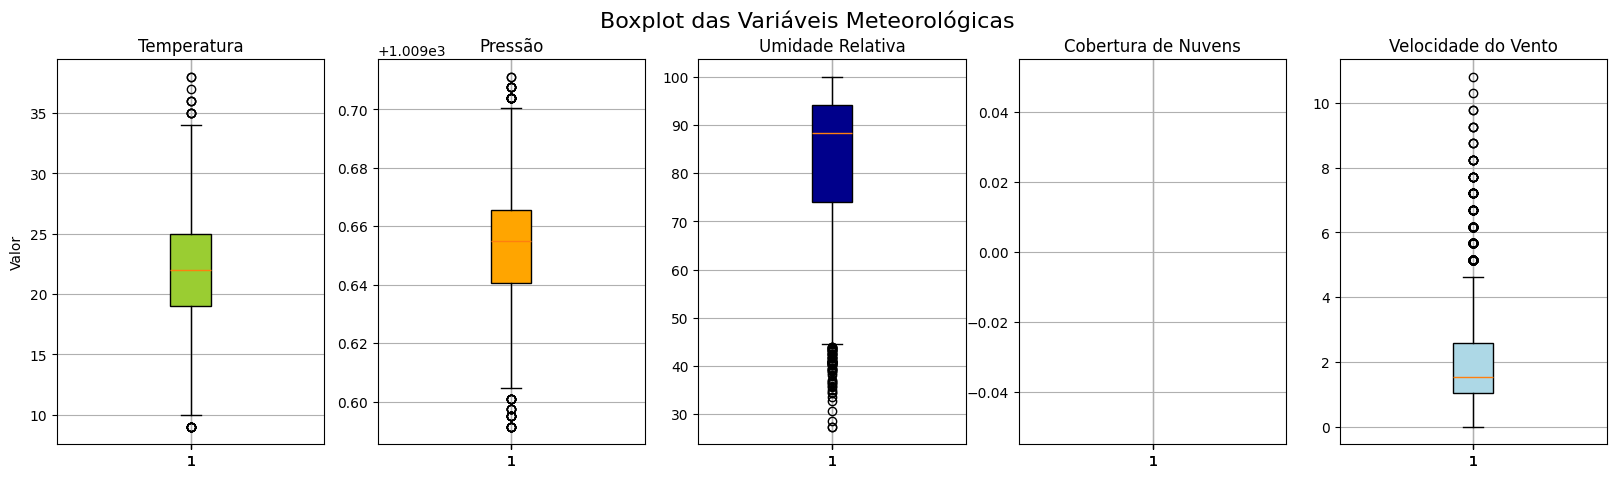

O percentil 99 da temperatura é: 32.0
O percentil 99 da pressão é: 1009.6967607391396
O percentil 99 da cco é: 8.0
O percentil 99 da velocidade do vento é: 6.173328


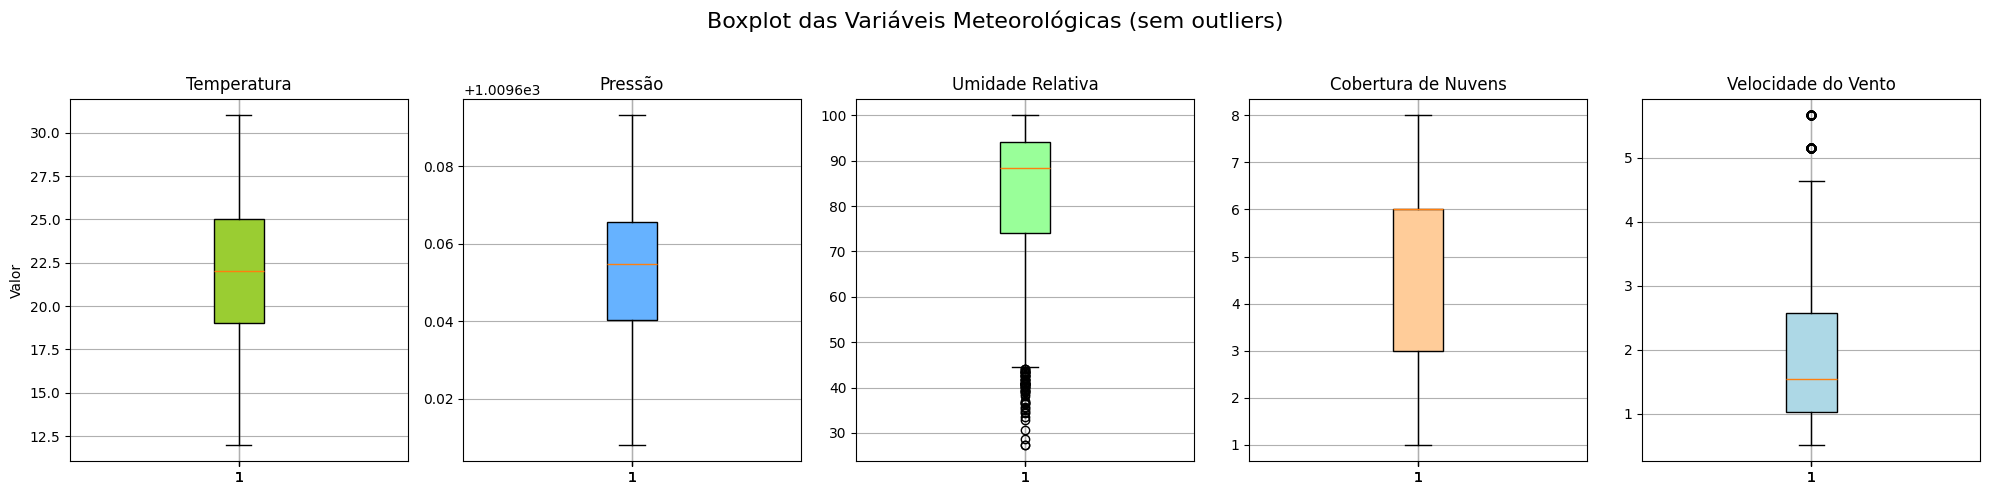

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Fazendo boxplot das variáveis
fig, ax = plt.subplots(1, 5, figsize=(20, 5), sharex=True)
fig.suptitle('Boxplot das Variáveis Meteorológicas', fontsize=16)

# Adicionando cor às caixas
ax[0].boxplot(metSuperficie['temp'], patch_artist=True, boxprops=dict(facecolor='yellowgreen'))
ax[0].set_title('Temperatura')
ax[0].set_ylabel('Valor')

ax[1].boxplot(metSuperficie['p'], patch_artist=True, boxprops=dict(facecolor='orange'))
ax[1].set_title('Pressão')

ax[2].boxplot(metSuperficie['relh'], patch_artist=True, boxprops=dict(facecolor='darkblue'))
ax[2].set_title('Umidade Relativa')

ax[3].boxplot(metSuperficie['cco'], patch_artist=True, boxprops=dict(facecolor='#FFCC99'))
ax[3].set_title('Cobertura de Nuvens')

ax[4].boxplot(metSuperficie['ws'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax[4].set_title('Velocidade do Vento')

for a in ax:
    a.grid(True)
plt.show()

# Removendo valores acima do percentil 99
temp99 = np.percentile(metSuperficie['temp'], 99)
p99 = np.percentile(metSuperficie['p'], 99)
cco99 = np.nanpercentile(metSuperficie['cco'], 99)
ws99 = np.percentile(metSuperficie['ws'], 99)

print(f'O percentil 99 da temperatura é: {temp99}')
print(f'O percentil 99 da pressão é: {p99}')
print(f'O percentil 99 da cco é: {cco99}')
print(f'O percentil 99 da velocidade do vento é: {ws99}')

fig, ax = plt.subplots(1, 5, figsize=(20, 5), sharex=True)
fig.suptitle('Boxplot das Variáveis Meteorológicas (sem outliers)', fontsize=16)

# Adicionando cor às caixas
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) & 
                                    (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))], 
              patch_artist=True, boxprops=dict(facecolor='yellowgreen'))
ax[0].set_title('Temperatura')
ax[0].set_ylabel('Valor')

ax[1].boxplot(metSuperficie['p'][(metSuperficie['p'] < p99) & 
                                  (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))], 
              patch_artist=True, boxprops=dict(facecolor='#66B2FF'))
ax[1].set_title('Pressão')

ax[2].boxplot(metSuperficie['relh'], patch_artist=True, boxprops=dict(facecolor='#99FF99'))
ax[2].set_title('Umidade Relativa')

ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])], patch_artist=True, boxprops=dict(facecolor='#FFCC99'))
ax[3].set_title('Cobertura de Nuvens')

ax[4].boxplot(metSuperficie['ws'][(metSuperficie['ws'] < ws99) & 
                                  (metSuperficie['ws'] > np.percentile(metSuperficie['ws'], 0.5))], 
              patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax[4].set_title('Velocidade do Vento')

for a in ax:
    a.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\guilh\AppData\Local\Temp\ipykernel_22568\2300235545.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = metSuperficie.resample('M').mean()


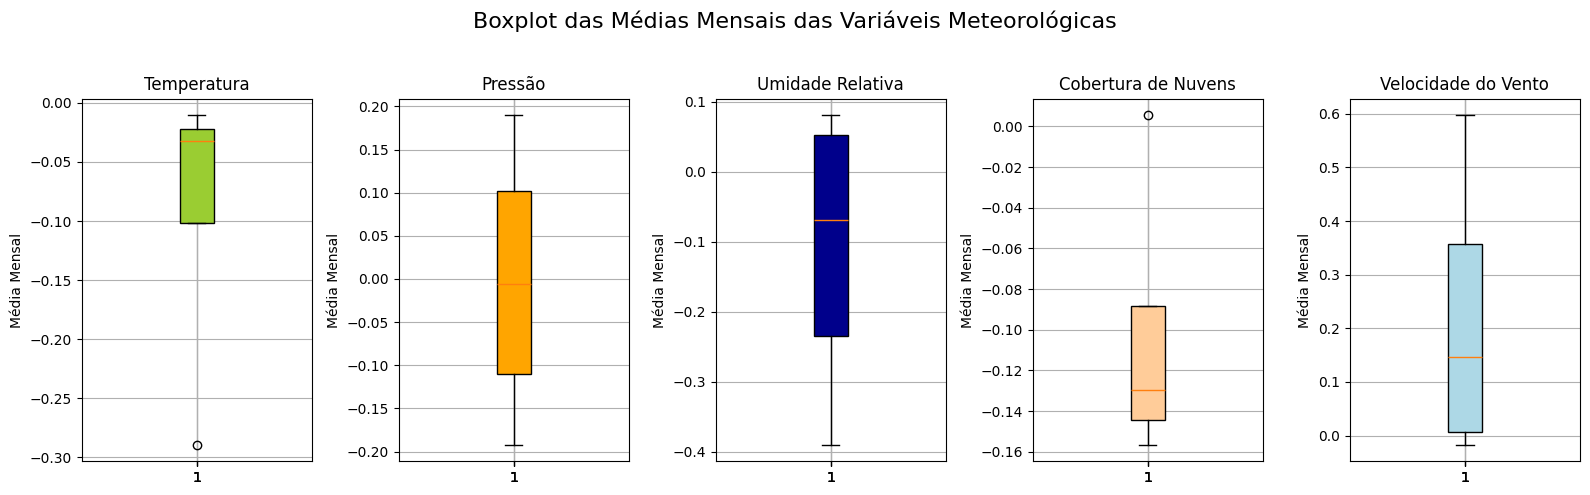

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exemplo de dados
np.random.seed(0)
dates = pd.date_range('20220101', periods=100)
metSuperficie = pd.DataFrame(np.random.randn(100, 5), index=dates, columns=['temp', 'p', 'relh', 'cco', 'ws'])
metSuperficie.loc[metSuperficie.index[::10], 'temp'] = np.nan  # Introduzindo valores faltantes para simular dados reais

# Calculando as médias mensais
monthly_means = metSuperficie.resample('M').mean()

# Fazendo boxplot das médias mensais
fig, ax = plt.subplots(1, 5, figsize=(16, 5), sharex=True)
fig.suptitle('Boxplot das Médias Mensais das Variáveis Meteorológicas', fontsize=16)
box_colors = ['yellowgreen', 'orange', 'darkblue', '#FFCC99', 'lightblue']

for i, (col, color) in enumerate(zip(monthly_means.columns, box_colors)):
    box = ax[i].boxplot(monthly_means[col].dropna(), patch_artist=True)
    ax[i].set_title(['Temperatura', 'Pressão', 'Umidade Relativa', 'Cobertura de Nuvens', 'Velocidade do Vento'][i])
    ax[i].set_ylabel('Média Mensal')
    ax[i].grid(True)
    for patch in box['boxes']:
        patch.set_facecolor(color)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


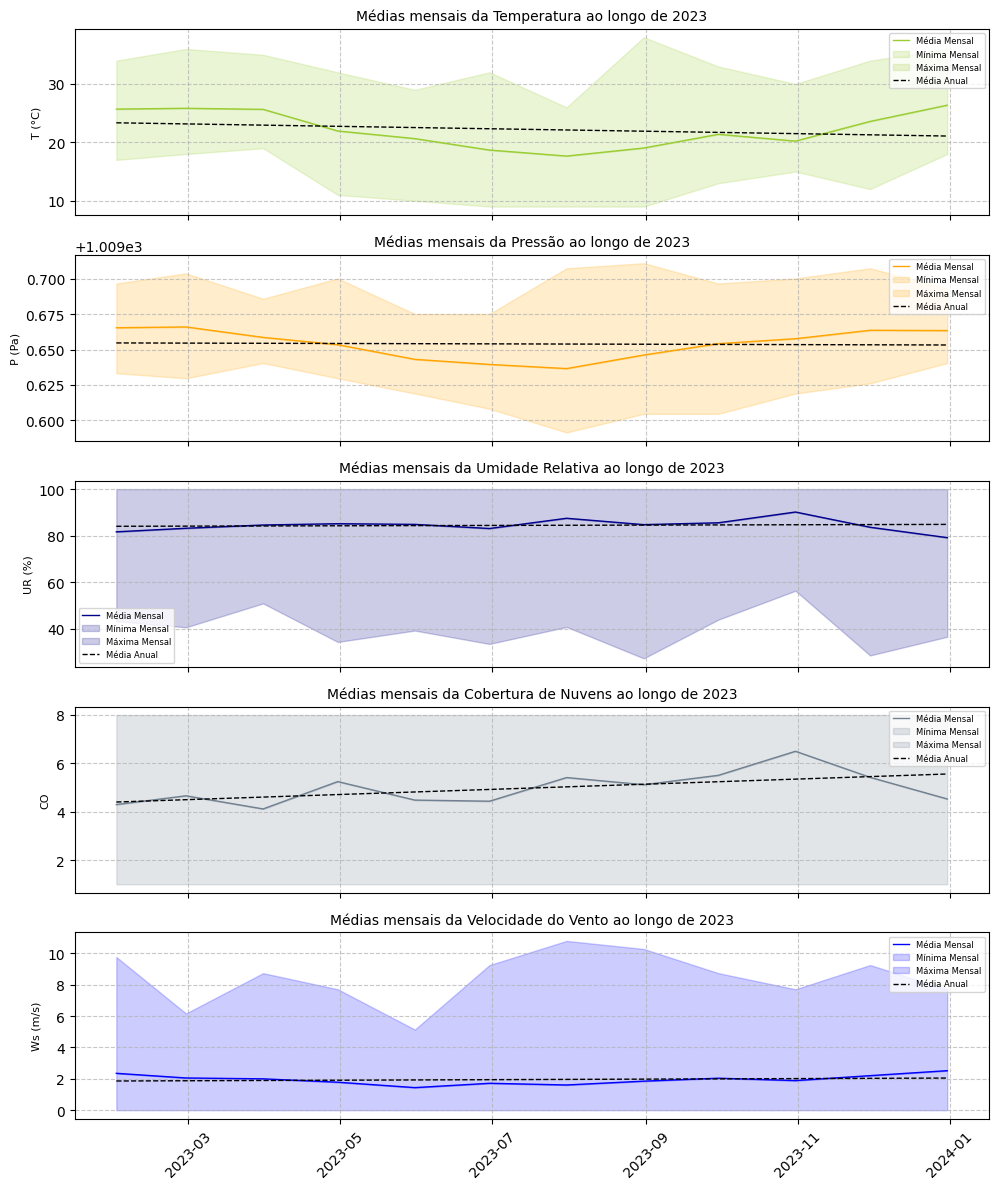

In [92]:
# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(5, sharex=True, figsize=(10, 12))

# Lista de variáveis e cores correspondentes
variaveis_cores = [('temp', 'yellowgreen'), ('p', 'orange'), ('relh', 'darkblue'), ('cco', 'slategray'), ('ws', 'blue'),]

# Lista dos nomes para os eixos y
nomes_eixos_y = ['T (°C)', 'P (Pa)', 'UR (%)', 'CO', 'Ws (m/s)', 'Wd (°)']

# Lista dos nomes completos dos parâmetros
nomes_completos = ['Temperatura', 'Pressão', 'Umidade Relativa', 'Cobertura de Nuvens', 'Velocidade do Vento',]

# Plotando cada variável
for i, (variavel, cor) in enumerate(variaveis_cores):
    ax[i].plot(media_mensal.index, media_mensal[variavel], color=cor, label='Média Mensal', linewidth=1)
    ax[i].fill_between(media_mensal.index, min_mensal[variavel], media_mensal[variavel], color=cor, alpha=0.2, label='Mínima Mensal')
    ax[i].fill_between(media_mensal.index, media_mensal[variavel], max_mensal[variavel], color=cor, alpha=0.2, label='Máxima Mensal')
    
    # Adicionando a média anual
    z = np.polyfit(media_mensal.index.to_julian_date(), media_mensal[variavel], 1)
    p = np.poly1d(z)
    ax[i].plot(media_mensal.index, p(media_mensal.index.to_julian_date()), color='black', linestyle='--', label='Média Anual', linewidth=1)
    
    ax[i].set_ylabel(nomes_eixos_y[i], fontsize=8)  # Usando os nomes da lista para os eixos y
    ax[i].legend(fontsize=6)
    ax[i].grid(True, linestyle='--', alpha=0.7)
    
    # Adicionando o título ao gráfico
    titulo = f'Médias mensais da {nomes_completos[i]} ao longo de 2023'
    ax[i].set_title(titulo, fontsize=10)

# Rotacionar os rótulos do eixo x
ax[-1].tick_params(axis='x', rotation=45)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

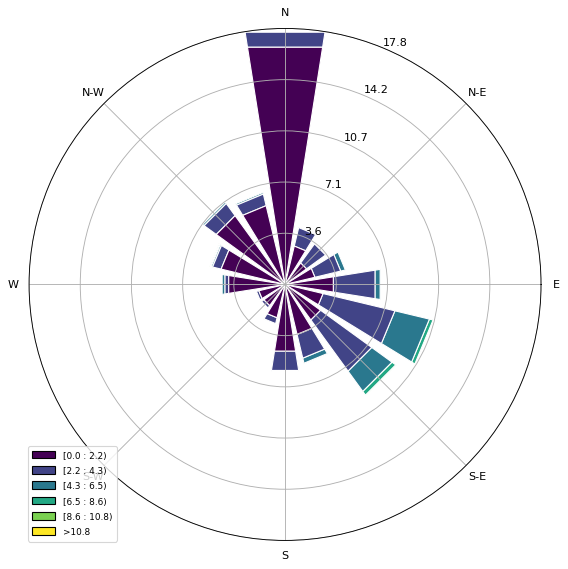

In [190]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()


# Análise dos dados metereológicos 
Inicialmente, nota-se que os piccos de velocidade do vento ocorrem no verão, o que facilita a dispersão de poluentes nessa estação, entretanto, deve ser levado em conta que a umidade relativa também apresenta seus maiores valores nesse período, o que, a depender da interação com poluentes, pode acarretar em pioras na qualidade do ar. Além disso, ao analisar a rosa dos ventos gerada, nota-se uma predomiancia na direção do vendo sentido norte. Desse modo, é plausível a hipótese de que os bairos localizados ao norte da fabrica da Tupy, em Joinville, podem ter impactos mais significativos pelos poluentes emitidos no processo. Exemplos de localidades enquadradas nessa análise, é o bairro desamente povoado "Jardim Iririú" localizao ao norte da fábrica. 

## 2) Análise do perfil de temperatrua
* Analise os dados de 0 e 12 horas durante10 dias, sendo 5 no verão e 5 no inverno.
* Determinação dos pontos de inversão e possível altura da camada limite.
* Avaliação a evolução da camada limite ao longo do dia e entre as estações do ano.

In [191]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

Dados de verão em 2023-01-01:
Altura da camada limite às 0h: 3705.0 m
Altura da camada limite às 12h: 1501 m
Dados de verão em 2023-01-02:
Altura da camada limite às 0h: 3206.0 m
Altura da camada limite às 12h: 1678 m
Dados de verão em 2023-01-03:
Altura da camada limite às 0h: 1471.0 m
Altura da camada limite às 12h: 876 m
Dados de verão em 2023-01-04:
Altura da camada limite às 0h: 1363 m
Altura da camada limite às 12h: 18923 m
Dados de verão em 2023-01-05:
Altura da camada limite às 0h: 3642 m
Altura da camada limite às 12h: 14902.0 m
Dados de inverno em 2023-07-01:


IndexError: index 20 is out of bounds for axis 0 with size 20

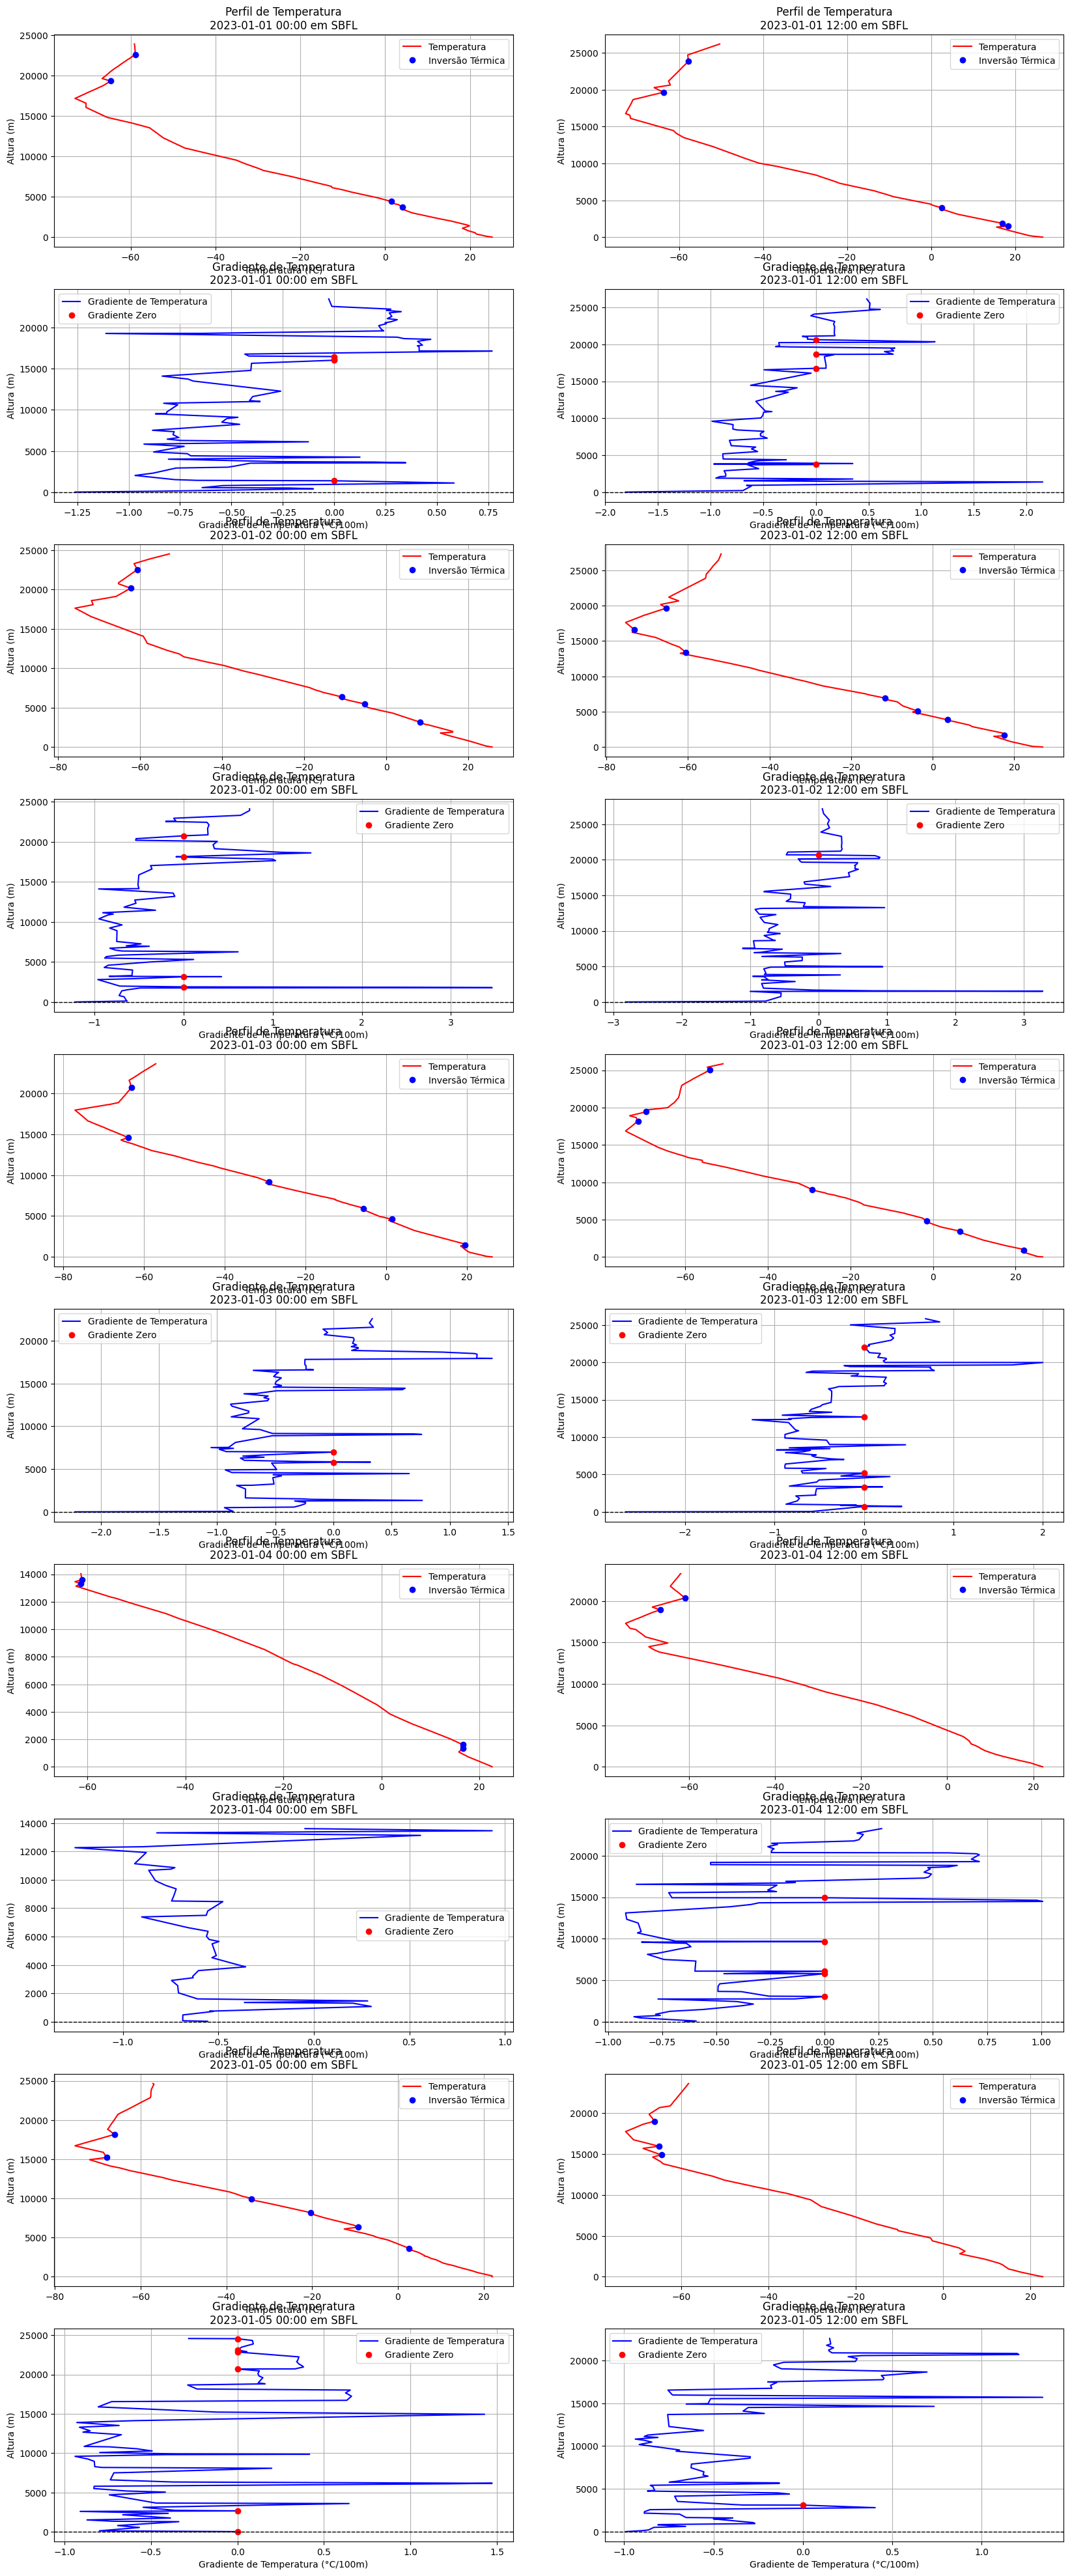

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Definindo a estação e a localização (Florianópolis)
station = 'SBFL'

# Função para calcular a altura da camada limite e identificar os pontos de inversão térmica
def calcular_altura_camada_limite(profile):
    inversao_termica_idx = []
    for i in range(1, len(profile['temperature']) - 1):
        if (profile['temperature'][i] > profile['temperature'][i - 1] and
            profile['temperature'][i] > profile['temperature'][i + 1]):
            inversao_termica_idx.append(i)
            
    # Calculando a altura da camada limite (baseada na primeira inversão térmica)
    if inversao_termica_idx:
        altura_camada_limite = profile['height'][inversao_termica_idx[0]]
    else:
        altura_camada_limite = None
    
    return altura_camada_limite, inversao_termica_idx

# Função para plotar o perfil de temperatura e marcar as inversões térmicas
def plotar_perfil(ax, profile, date, inversao_termica_idx):
    ax.plot(profile['temperature'], profile['height'], 'r', label='Temperatura')
    
    # Marcar pontos de inversão térmica
    if inversao_termica_idx:
        ax.plot(profile['temperature'][inversao_termica_idx], profile['height'][inversao_termica_idx], 'bo', label='Inversão Térmica')
    
    ax.set_xlabel('Temperatura (°C)')
    ax.set_ylabel('Altura (m)')
    ax.set_title(f'Perfil de Temperatura\n{date.strftime("%Y-%m-%d %H:%M")} em {station}')
    ax.legend()
    ax.grid(True)

# Função para calcular o gradiente de temperatura a cada 100 metros
def calcular_gradiente_temperatura(profile):
    deltaT = np.diff(profile['temperature'])
    deltaZ = np.diff(profile['height'])
    dTdZ = (deltaT / deltaZ) * 100  # Gradiente de temperatura a cada 100 m
    return dTdZ

# Função para plotar o gradiente de temperatura e marcar gradientes zero
def plotar_gradiente(ax, dTdZ, alturas, date):
    ax.plot(dTdZ, alturas[:-1], 'b', label='Gradiente de Temperatura')
    
    # Encontrar e marcar os pontos onde o gradiente é zero
    zero_grad_idx = np.where(dTdZ == 0)[0]
    ax.plot(dTdZ[zero_grad_idx], alturas[zero_grad_idx], 'ro', label='Gradiente Zero')
    
    # Adicionar uma linha horizontal no gradiente de temperatura
    ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
    
    ax.set_xlabel('Gradiente de Temperatura (°C/100m)')
    ax.set_ylabel('Altura (m)')
    ax.set_title(f'Gradiente de Temperatura\n{date.strftime("%Y-%m-%d %H:%M")} em {station}')
    ax.legend()
    ax.grid(True)

# Analisando dados de 0 e 12 horas durante 10 dias (5 no verão e 5 no inverno)

fig, axs = plt.subplots(10, 2, figsize=(20, 50))
axs = axs.flatten()

# Verão
for i in range(5):
    # Definindo datas para o verão
    date_verao = datetime(2023, 1, 1) + timedelta(days=i)

    # Coletando os dados de 0 horas
    profile_verao_0 = WyomingUpperAir.request_data(date_verao.replace(hour=0), station)

    # Coletando os dados de 12 horas
    profile_verao_12 = WyomingUpperAir.request_data(date_verao.replace(hour=12), station)

    # Plotando e analisando perfil de temperatura
    print(f"Dados de verão em {date_verao.strftime('%Y-%m-%d')}:")
    altura_camada_limite_verao_0, inversao_termica_idx_0 = calcular_altura_camada_limite(profile_verao_0)
    altura_camada_limite_verao_12, inversao_termica_idx_12 = calcular_altura_camada_limite(profile_verao_12)
    
    plotar_perfil(axs[i * 4], profile_verao_0, date_verao.replace(hour=0), inversao_termica_idx_0)
    plotar_perfil(axs[i * 4 + 1], profile_verao_12, date_verao.replace(hour=12), inversao_termica_idx_12)

    print(f"Altura da camada limite às 0h: {altura_camada_limite_verao_0} m")
    print(f"Altura da camada limite às 12h: {altura_camada_limite_verao_12} m")

    # Calculando e plotando gradiente de temperatura
    dTdZ_verao_0 = calcular_gradiente_temperatura(profile_verao_0)
    dTdZ_verao_12 = calcular_gradiente_temperatura(profile_verao_12)
    
    plotar_gradiente(axs[i * 4 + 2], dTdZ_verao_0, profile_verao_0['height'], date_verao.replace(hour=0))
    plotar_gradiente(axs[i * 4 + 3], dTdZ_verao_12, profile_verao_12['height'], date_verao.replace(hour=12))

# Inverno
for i in range(5):
    # Definindo datas para o inverno
    date_inverno = datetime(2023, 7, 1) + timedelta(days=i)

    # Coletando os dados de 0 horas
    profile_inverno_0 = WyomingUpperAir.request_data(date_inverno.replace(hour=0), station)

    # Coletando os dados de 12 horas
    profile_inverno_12 = WyomingUpperAir.request_data(date_inverno.replace(hour=12), station)

    # Plotando e analisando perfil de temperatura
    print(f"Dados de inverno em {date_inverno.strftime('%Y-%m-%d')}:")
    altura_camada_limite_inverno_0, inversao_termica_idx_0 = calcular_altura_camada_limite(profile_inverno_0)
    altura_camada_limite_inverno_12, inversao_termica_idx_12 = calcular_altura_camada_limite(profile_inverno_12)
    
    plotar_perfil(axs[(i + 5) * 4], profile_inverno_0, date_inverno.replace(hour=0), inversao_termica_idx_0)
    plotar_perfil(axs[(i + 5) * 4 + 1], profile_inverno_12, date_inverno.replace(hour=12), inversao_termica_idx_12)

    print(f"Altura da camada limite às 0h: {altura_camada_limite_inverno_0} m")
    print(f"Altura da camada limite às 12h: {altura_camada_limite_inverno_12} m")

    # Calculando e plotando gradiente de temperatura
    dTdZ_inverno_0 = calcular_gradiente_temperatura(profile_inverno_0)
    dTdZ_inverno_12 = calcular_gradiente_temperatura(profile_inverno_12)
    
    plotar_gradiente(axs[(i + 5) * 4 + 2], dTdZ_inverno_0, profile_inverno_0['height'], date_inverno.replace(hour=0))
    plotar_gradiente(axs[(i + 5) * 4 + 3], dTdZ_inverno_12, profile_inverno_12['height'], date_inverno.replace(hour=12))

plt.tight_layout()
plt.show()


## Análise da altura da camada e inversão térmica no Inverno e no verão
c

#  3 - Avaliação da altura da camada limite e turbulência em 2023 Através da base gerado pela plataforma EZ-AERMET . 
* Realização de figuras e analise as condições meteorológicas e sua potencial influência na qualidade do ar.
* Analise também a superficie do local de estudo utilizando o output da plataforma EZ-AERMET.
* Verifique os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento.
* Faça uma figura com o recorte feito pela plataforma, utilizando uma imagem de fundo de um satélite.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo
file_path = r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\inputs\METEO\METEO.csv'

# Carregar a tabela
df = pd.read_csv(file_path)

# Exibir as primeiras linhas da tabela para verificar se foi carregada corretamente
print(df.head())




   year  month  day  hour  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  \
0    23      1    1     1           1       -34.2       0.392        -9.0   
1    23      1    1     1           2       -13.1       0.153        -9.0   
2    23      1    1     1           3      -999.0      -9.000        -9.0   
3    23      1    1     1           4      -999.0      -9.000        -9.0   
4    23      1    1     1           5      -999.0      -9.000        -9.0   

   Unnamed: 8  Unnamed: 9  ...  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0        -9.0        -999  ...           14        299.1            2   
1        -9.0        -999  ...           14        298.1            2   
2        -9.0        -999  ...           -9        999.0           -9   
3        -9.0        -999  ...           -9        999.0           -9   
4        -9.0        -999  ...           -9        999.0           -9   

   Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  \
0            0            0 

   year  month  day  Julian day  hour  sensible heat flux (W/m2)  \
0    23      1    1           1     1                      -34.2   
1    23      1    1           1     2                      -13.1   
2    23      1    1           1     3                     -999.0   
3    23      1    1           1     4                     -999.0   
4    23      1    1           1     5                     -999.0   

   surface friction velocity (m/s)  \
0                            0.392   
1                            0.153   
2                           -9.000   
3                           -9.000   
4                           -9.000   

   convective velocity scale (set to -9.0 for stable atmosphere) (m/s)   \
0                                               -9.0                      
1                                               -9.0                      
2                                               -9.0                      
3                                               -9.0          

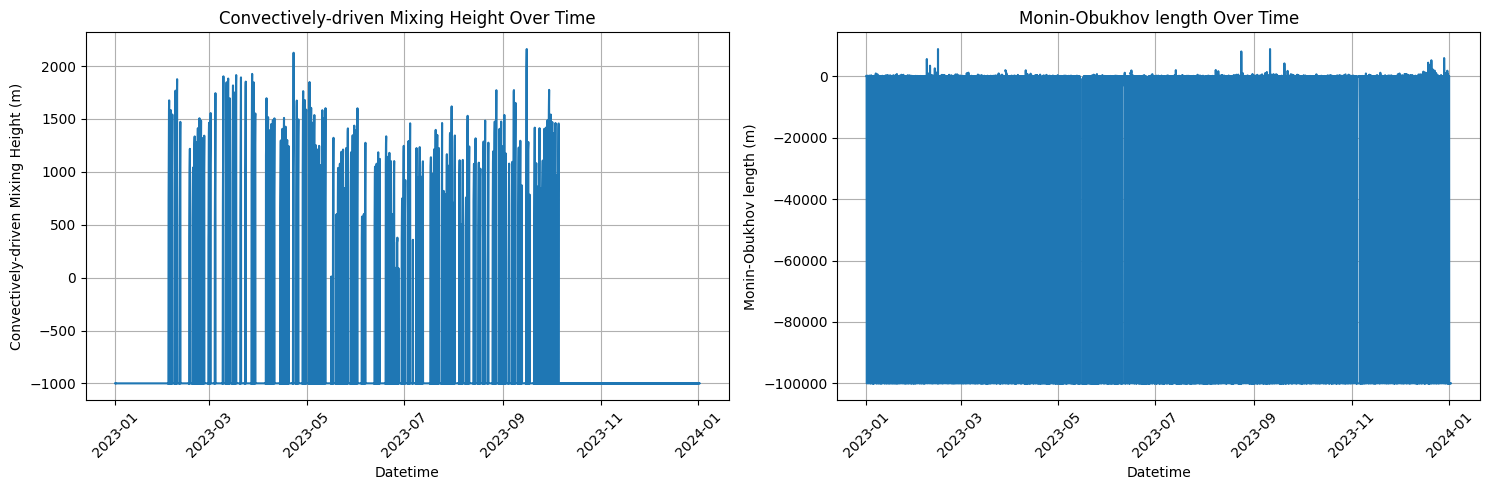

In [65]:
#ESTA PARTE DO CÓDIGO TEVE AUXÍLIO DO ALUNO RAMON VIERIA. 
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo CSV
file_path = r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\inputs\METEO\METEO.csv'

# Carregando a planilha base do arquivo CSV
df = pd.read_csv(file_path)

# Verificar as primeiras linhas do DataFrame para garantir que as colunas estão corretas
print(df.head())

# Função para converter ano de dois dígitos para quatro dígitos
def convert_year(two_digit_year):
    return 2000 + two_digit_year

# Função para ajustar as horas
def adjust_hours(hour):
    if hour == 24:
        return 0
    return hour

# Verificar se as colunas necessárias estão presentes no DataFrame
required_columns = ['year', 'month', 'day', 'hour', 'mixing_height', 'Monin-Obukhov']
for col in required_columns:
    if col not in df.columns:
        print(f"Coluna '{col}' não encontrada no DataFrame")
        raise KeyError(f"Coluna '{col}' não encontrada no DataFrame")

# Aplicando a conversão do ano e criando a coluna datetime
df['datetime'] = pd.to_datetime(df.apply(lambda row: f"{convert_year(row['year'])}-{row['month']:02d}-{row['day']:02d} {adjust_hours(row['hour']):02d}:00", axis=1))

# Função para melhorar a estética dos gráficos
def enhance_plot(ax, xlabel, ylabel, title):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Criando os gráficos em duas colunas por linha
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotando a coluna "mixing_height" em relação à coluna datetime
axes[0].plot(df['datetime'], df['mixing_height'])
enhance_plot(axes[0], 'Datetime', 'Convectively-driven Mixing Height (m)', 'Convectively-driven Mixing Height Over Time')

# Plotando a coluna "Monin-Obukhov" em relação à coluna datetime
axes[1].plot(df['datetime'], df['Monin-Obukhov'])
enhance_plot(axes[1], 'Datetime', 'Monin-Obukhov length (m)', 'Monin-Obukhov length Over Time')

plt.tight_layout()
plt.show()



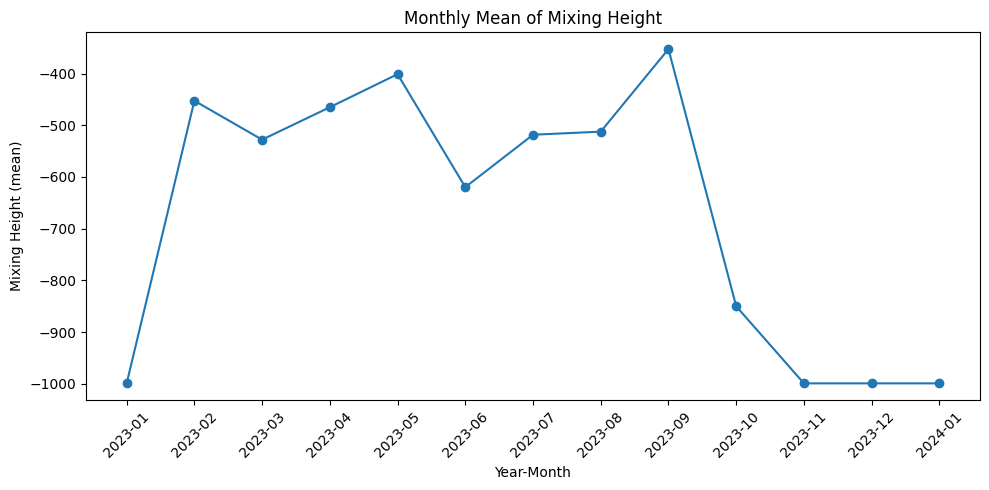

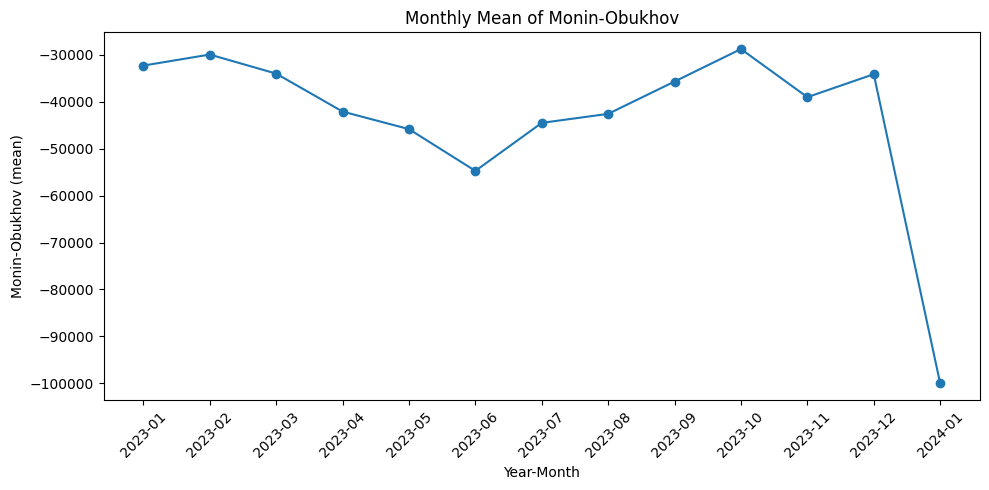

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo a coluna datetime para o tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Criando uma nova coluna para o ano e mês
df['year_month'] = df['datetime'].dt.to_period('M')

# Selecionando apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Adicionando a coluna year_month de volta ao DataFrame numérico
df_numeric['year_month'] = df['year_month']

# Calculando a média mensal
monthly_means = df_numeric.groupby('year_month').mean()

# Plotando a média mensal da coluna "mixing_height"
plt.figure(figsize=(10, 5))
plt.plot(monthly_means.index.astype(str), monthly_means['mixing_height'], marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Mixing Height (mean)')
plt.title('Monthly Mean of Mixing Height')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotando a média mensal da coluna "Monin-Obukhov"
plt.figure(figsize=(10, 5))
plt.plot(monthly_means.index.astype(str), monthly_means['Monin-Obukhov'], marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Monin-Obukhov (mean)')
plt.title('Monthly Mean of Monin-Obukhov')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
import pandas as pd
import numpy as np

# Carregar os dados do arquivo CSV
file_path = R'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\inputs\METEO\METEO.csv'
data = pd.read_csv(file_path)

# Filtrar os valores de direção do vento iguais a 999
data = data[data['wind direction'] != 999]

# Definir os limites dos quadrantes de vento em graus
quadrant_limits = [(0, 90), (90, 180), (180, 270), (270, 360)]

# Inicializar listas para armazenar os valores médios dos parâmetros para cada quadrante
albedo_means = []
bowen_ratio_means = []
roughness_means = []

# Iterar sobre os quadrantes de vento
for lower_limit, upper_limit in quadrant_limits:
    # Selecionar os dados dentro do intervalo de direção do vento atual
    quadrant_data = data[(data['wind direction'] >= lower_limit) & (data['wind direction'] < upper_limit)]
    
    # Calcular os valores médios dos parâmetros para este quadrante
    albedo_mean = quadrant_data['albedo'].mean()
    bowen_ratio_mean = quadrant_data['Bowen ratio'].mean()
    roughness_mean = quadrant_data['roughness'].mean()
    
    # Adicionar os valores médios às listas
    albedo_means.append(albedo_mean)
    bowen_ratio_means.append(bowen_ratio_mean)
    roughness_means.append(roughness_mean)

# Imprimir os valores médios para cada quadrante de vento
for i, (lower_limit, upper_limit) in enumerate(quadrant_limits):
    print(f"Quadrante {i+1} (Direção do vento de {lower_limit}° a {upper_limit}°):")
    print(f"Albedo médio: {albedo_means[i]}")
    print(f"Razão de Bowen média: {bowen_ratio_means[i]}")
    print(f"Rugosidade média: {roughness_means[i]}")
    print()

Quadrante 1 (Direção do vento de 0° a 90°):
Albedo médio: 0.56864836872087
Razão de Bowen média: 0.7051838425686173
Rugosidade média: 0.8033250647332987

Quadrante 2 (Direção do vento de 90° a 180°):
Albedo médio: 0.5080818301803783
Razão de Bowen média: 0.7177078750549933
Rugosidade média: 0.5127520897492301

Quadrante 3 (Direção do vento de 180° a 270°):
Albedo médio: 0.5176477832512316
Razão de Bowen média: 0.7338177339901478
Rugosidade média: 0.8947964285714286

Quadrante 4 (Direção do vento de 270° a 360°):
Albedo médio: 0.5576974789915966
Razão de Bowen média: 0.7226610644257702
Rugosidade média: 0.9255391596638655



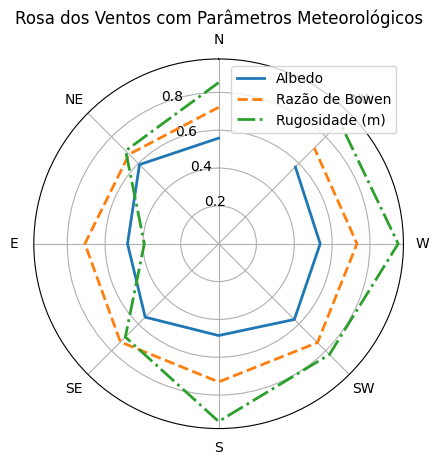

Octante N:
Média de Albedo: 0.56
Média de Razão de Bowen: 0.72
Média de Rugosidade (m): 0.85

Octante NE:
Média de Albedo: 0.59
Média de Razão de Bowen: 0.67
Média de Rugosidade (m): 0.70

Octante E:
Média de Albedo: 0.48
Média de Razão de Bowen: 0.71
Média de Rugosidade (m): 0.39

Octante SE:
Média de Albedo: 0.55
Média de Razão de Bowen: 0.73
Média de Rugosidade (m): 0.70

Octante S:
Média de Albedo: 0.49
Média de Razão de Bowen: 0.73
Média de Rugosidade (m): 0.94

Octante SW:
Média de Albedo: 0.57
Média de Razão de Bowen: 0.74
Média de Rugosidade (m): 0.83

Octante W:
Média de Albedo: 0.54
Média de Razão de Bowen: 0.73
Média de Rugosidade (m): 0.95

Octante NW:
Média de Albedo: 0.57
Média de Razão de Bowen: 0.72
Média de Rugosidade (m): 0.91



In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
file_path = r'C:\Users\guilh\OneDrive\Desktop\polatm\ENS410064\inputs\METEO\METEO.csv'
data = pd.read_csv(file_path)

# Filtrar os valores de direção do vento iguais a 999
data = data[data['wind direction'] != 999]

# Definir os limites dos octantes de vento em graus
octant_limits = [(0, 45), (45, 90), (90, 135), (135, 180), (180, 225), (225, 270), (270, 315), (315, 360)]

# Inicializar listas para armazenar os valores médios dos parâmetros para cada octante
albedo_means = []
bowen_ratio_means = []
roughness_means = []

# Iterar sobre os octantes de vento
for lower_limit, upper_limit in octant_limits:
    # Selecionar os dados dentro do intervalo de direção do vento atual
    octant_data = data[(data['wind direction'] >= lower_limit) & (data['wind direction'] < upper_limit)]
    
    # Calcular os valores médios dos parâmetros para este octante
    albedo_mean = octant_data['albedo'].mean()
    bowen_ratio_mean = octant_data['Bowen ratio'].mean()
    roughness_mean = octant_data['roughness'].mean()
    
    # Adicionar os valores médios às listas
    albedo_means.append(albedo_mean)
    bowen_ratio_means.append(bowen_ratio_mean)
    roughness_means.append(roughness_mean)

# Definir os rótulos dos octantes
octant_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

# Definir os ângulos para cada octante da rosa dos ventos (com o Norte para cima)
angles = np.radians([0, 45, 90, 135, 180, 225, 270, 315])

# Criar o gráfico da rosa dos ventos
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plotar os dados de albedo
ax.plot(angles, albedo_means, label='Albedo', linestyle='-', linewidth=2)

# Plotar os dados de razão de Bowen
ax.plot(angles, bowen_ratio_means, label='Razão de Bowen', linestyle='--', linewidth=2)

# Plotar os dados de rugosidade
ax.plot(angles, roughness_means, label='Rugosidade (m)', linestyle='-.', linewidth=2)

# Adicionar grade radial e definir as legendas
ax.grid(True)
ax.legend()

# Definir os rótulos dos ângulos
ax.set_xticks(angles)
ax.set_xticklabels(octant_labels)

# Inverter a direção do ângulo para que o Norte fique para cima
ax.set_theta_zero_location('N')

# Adicionar título ao gráfico
ax.set_title('Rosa dos Ventos com Parâmetros Meteorológicos')

# Mostrar o gráfico
plt.show()

# Iterar sobre os octantes de vento
for i, (label, albedo_mean, bowen_ratio_mean, roughness_mean) in enumerate(zip(octant_labels, albedo_means, bowen_ratio_means, roughness_means)):
    print(f'Octante {label}:')
    print(f'Média de Albedo: {albedo_mean:.2f}')
    print(f'Média de Razão de Bowen: {bowen_ratio_mean:.2f}')
    print(f'Média de Rugosidade (m): {roughness_mean:.2f}')
    print()

['Best GFS Quarter Degree Forecast Time Series']
['time1', 'latitude', 'reftime1', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


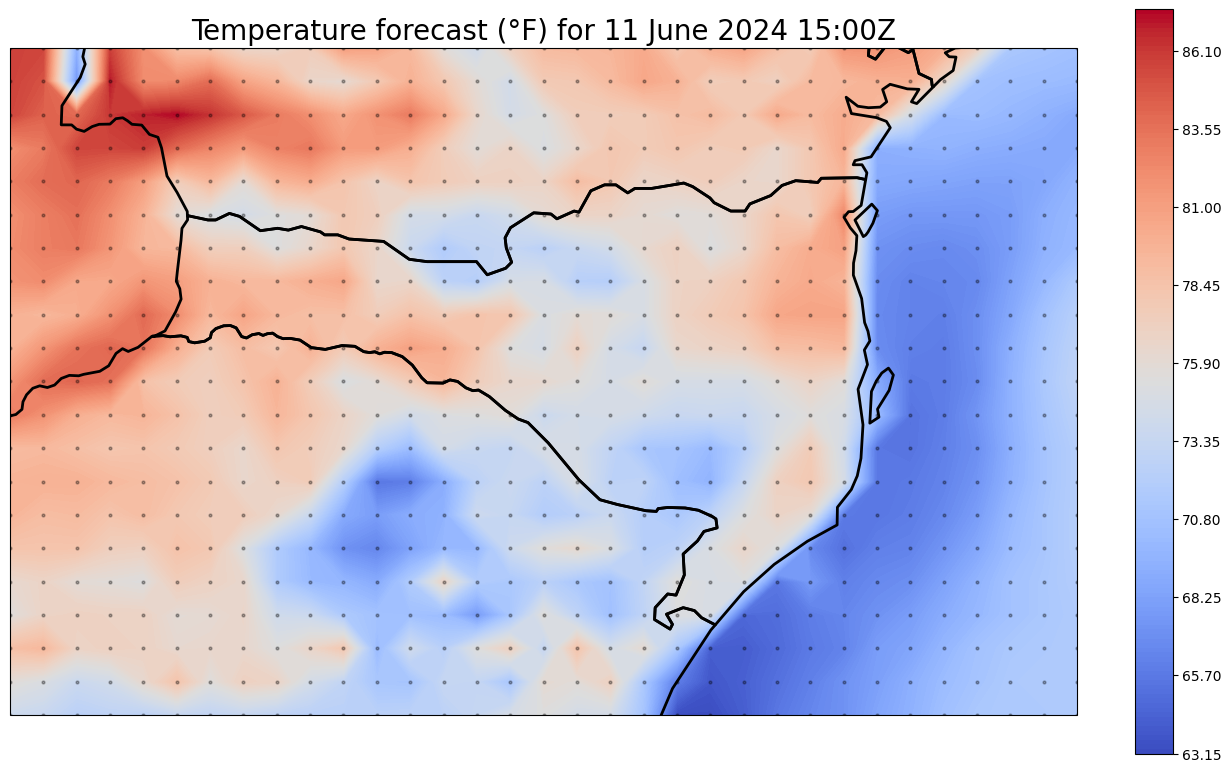

In [74]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-30, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55, -47, -30, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')